# EDA based on Year, Runtime, Budget


In [1]:
 #do basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [2]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb_data = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


Lets extract the movie year from the table



In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies['y'] = movies['title'].str.split(' ')
movies['year'] = movies['y'].apply(lambda x: x[-1])
movies['year'] = movies['year'].str.strip(')')
movies['year'] = movies['year'].str.strip('(')
movies.head()

,movieId,title,genres,y,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy, Story, (1995)]",1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Jumanji, (1995)]",1995
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier, Old, Men, (1995)]",1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Waiting, to, Exhale, (1995)]",1995
4,5,Father of the Bride Part II (1995),Comedy,"[Father, of, the, Bride, Part, II, (1995)]",1995


In [8]:
# lets drop the unnecessary 'y' column from the dataset
movies = movies.drop(['y'], axis = 1)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [9]:
movies['year'].value_counts()[:10]

2015    2513
2016    2488
2014    2403
2017    2375
2013    2165
2018    2034
2012    1959
2011    1821
2009    1721
2010    1673
Name: year, dtype: int64

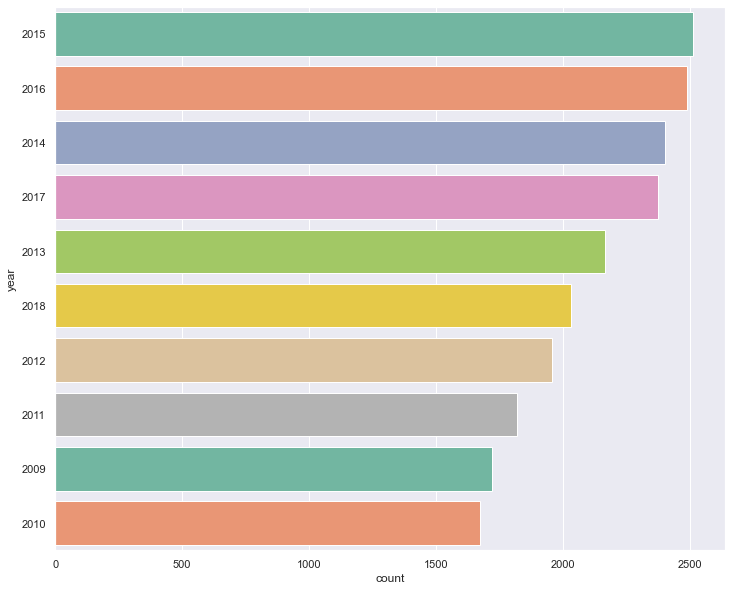

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=movies, palette="Set2", order=movies['year'].value_counts().index[0:10])

We are able to visualise that 2015 had the most movies in our dataset

In [11]:
###merge movies and imbd 
data = pd.merge(movies, imdb_data, on = 'movieId', how = 'inner')
data.head()

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,1995,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [12]:
##As we do not Require the MovieId, title_cast, director and plot_keywords lets remove them
data = data.drop(['movieId', 'title_cast', 'director','plot_keywords'], axis = 1)
data.head()


,title,genres,year,runtime,budget
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,81.0,"$30,000,000"
1,Jumanji (1995),Adventure|Children|Fantasy,1995,104.0,"$65,000,000"
2,Grumpier Old Men (1995),Comedy|Romance,1995,101.0,"$25,000,000"
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,124.0,"$16,000,000"
4,Father of the Bride Part II (1995),Comedy,1995,106.0,"$30,000,000"


In [13]:
##Realised that budget has different currencies.Dont know how to work through that

In [32]:
#sorting based on revenue
sortedbudget= data.sort_values(['budget'], ascending=False)
sortedbudget.head()

,title,genres,year,runtime,budget
14048,Faith Like Potatoes (2006),Drama,2006,NaN,"ZAR10,000,000"
21416,Brother (Hermano) (2010),Drama,2010,97.0,"VEB4,273,248"
21856,Kivski Freski (1966),Drama,1966,13.0,"UAH10,000"
22350,You Are the Apple of My Eye (2011),Comedy|Drama|Romance,2011,109.0,"TWD50,000,000"
14498,Cape No. 7 (Hái-kak chhit-ho) (2008),Comedy|Drama|Romance,2008,NaN,"TWD45,000,000"


In [14]:
data['runtime'].value_counts()[:10]

90.0     622
95.0     451
100.0    428
93.0     408
96.0     383
        ... 
30.0      17
40.0      17
155.0     16
7.0       16
10.0      15
Name: runtime, Length: 84, dtype: int64

In [15]:
data['runtime'].describe()

count    13521.000000
mean       101.366615
std         29.867424
min          1.000000
25%         90.000000
50%         98.000000
75%        110.000000
max        877.000000
Name: runtime, dtype: float64

The average runtime is 101 min

C:\Users\matea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

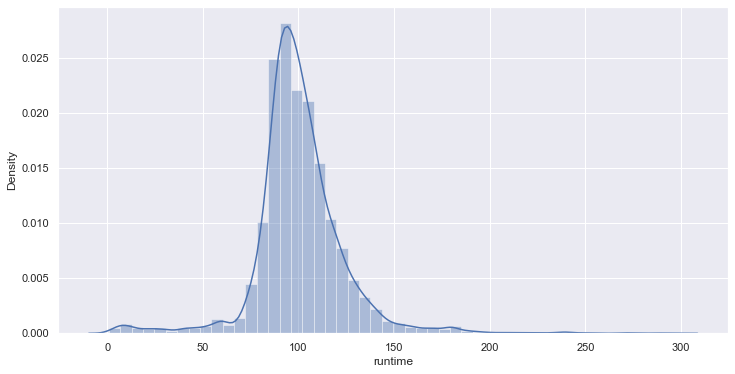

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(data[(data['runtime'] < 300) & (data['runtime'] > 0)]['runtime'])

So, a good amount of movies are among the duration of 90-120 mins.It is approximately the maximum time in which a large majority of the viewers can sit without going to the toilet and without drinking.  It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. 

C:\Users\matea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


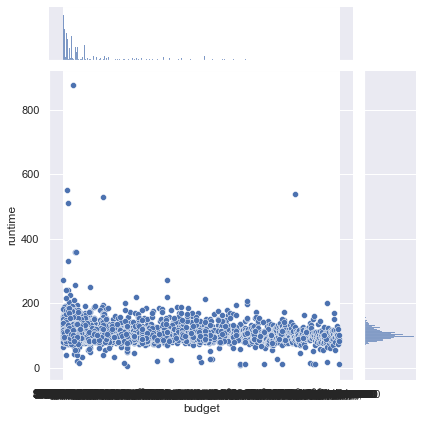

In [17]:
data_b = data[(data['budget'].notnull()) & (data['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=data_b)
plt.show()


In [18]:
data['budget'].describe()

count            7283
unique           1277
top       $20,000,000
freq              218
Name: budget, dtype: object

In [19]:
##genre = year

In [21]:
data['genres'].value_counts()[:10]

Drama                   4232
Comedy                  2111
Documentary             1628
Comedy|Drama            1178
Drama|Romance           1029
Comedy|Romance           723
Comedy|Drama|Romance     582
Horror                   482
Crime|Drama              420
Drama|Thriller           390
Name: genres, dtype: int64

The total number of movies with  Drama = 12486
The total number of movies with  Comedy = 7783
The total number of movies with  Documentary = 2079
The total number of movies with  Comedy|Drama = 17868
The total number of movies with  Drama|Romance = 13960


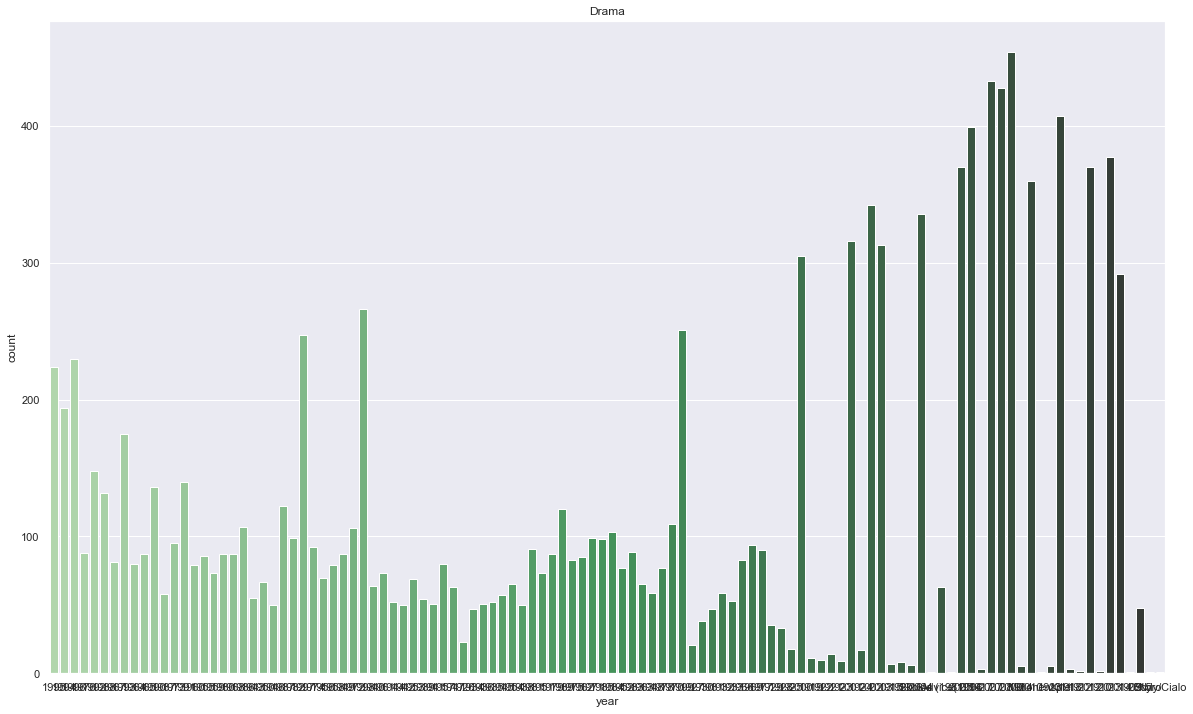

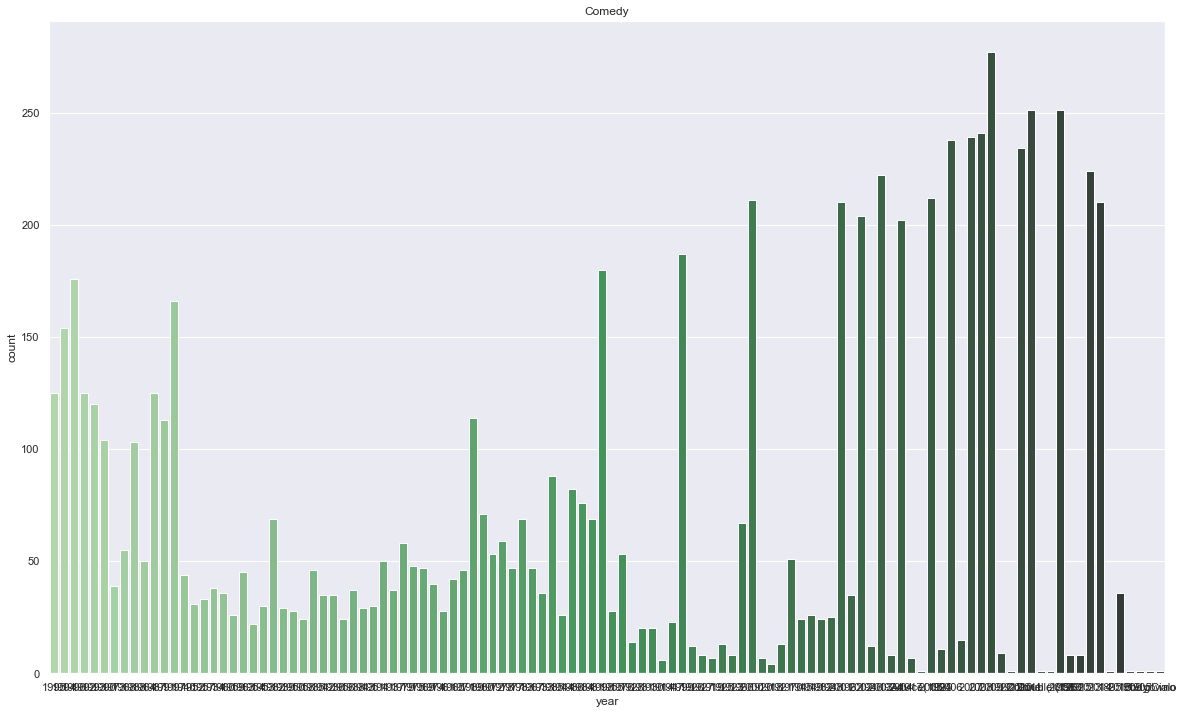

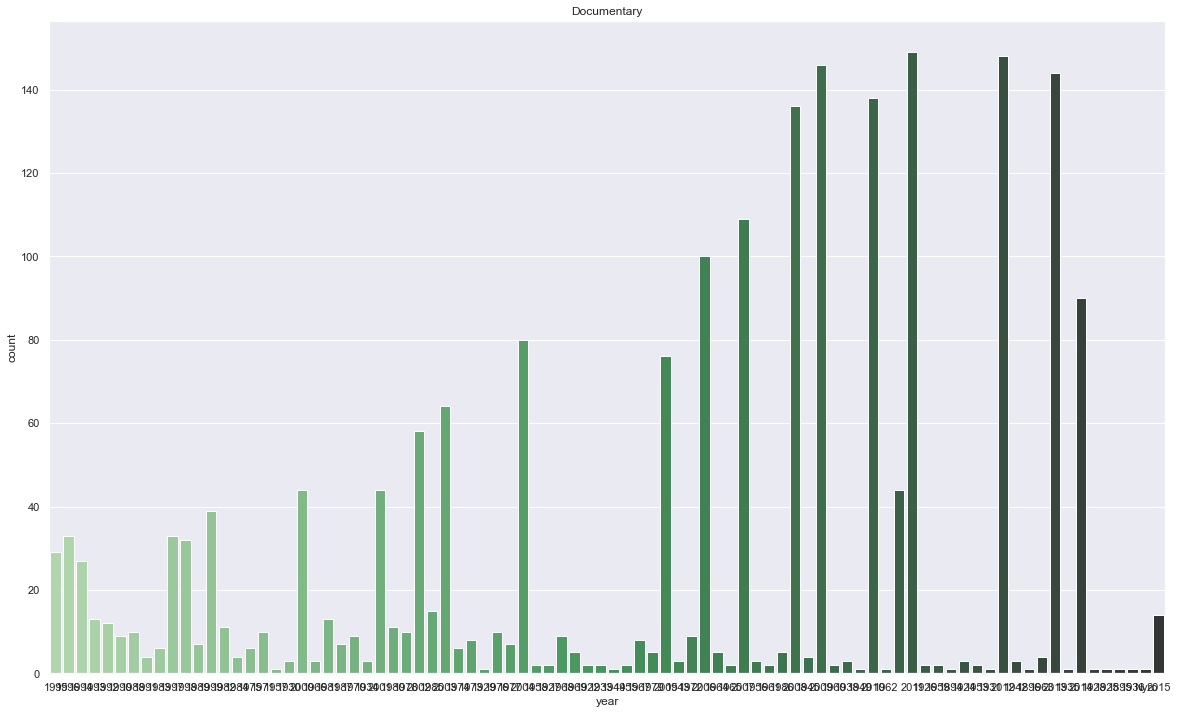

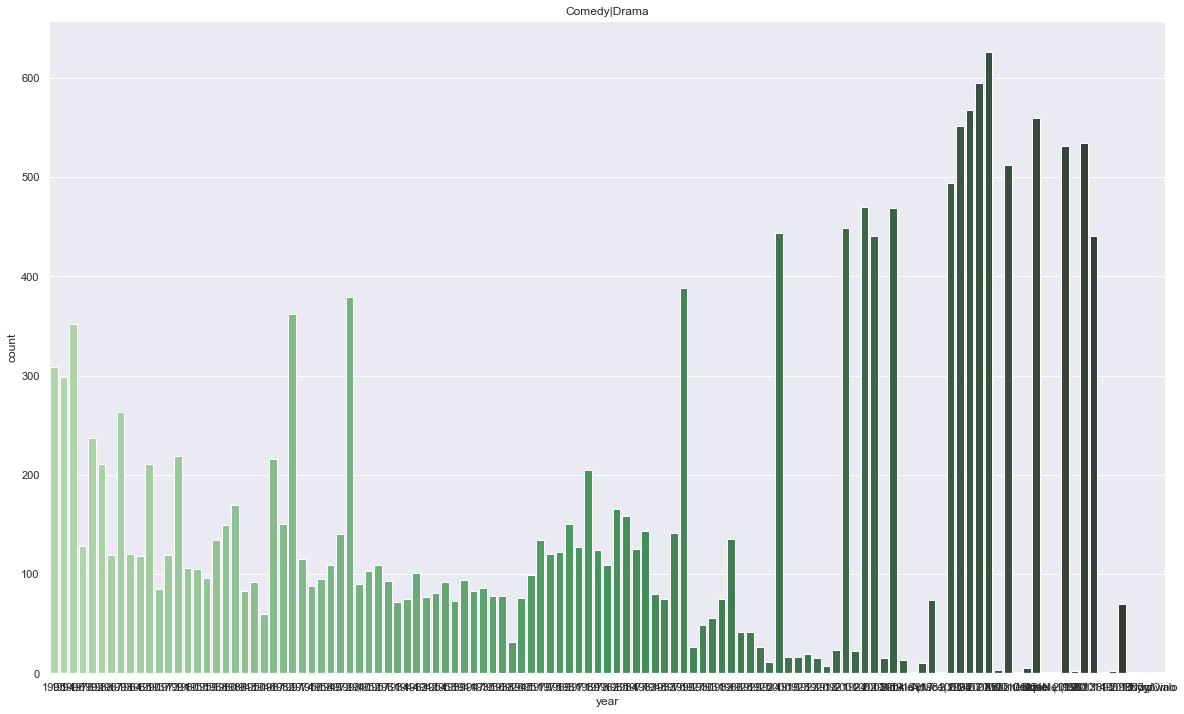

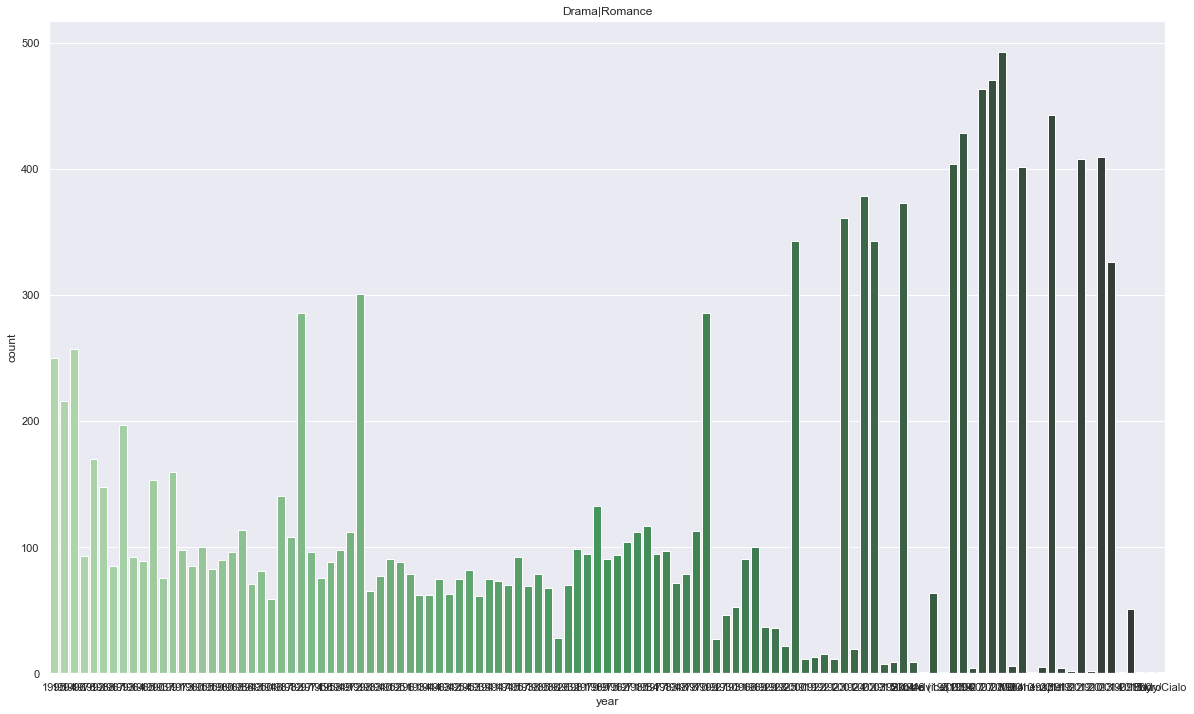

In [35]:
seperate_genre='Drama','Comedy','Documentary','Comedy|Drama','Drama|Romance'
for genre in seperate_genre:
    df = data['genres'].str.contains(genre).fillna(False)
    print('The total number of movies with ',genre,'=',len(data[df]))
    f, ax = plt.subplots(figsize=(20, 12))
    sns.countplot(x='year', data=data[df], palette="Greens_d");
    plt.title(genre)
    